# Módulo 1. Análisis básicos

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
# import statsmodels.stats.multicomp as multi  #AGREGUE ESTO PARA LOS ANÁLISIS POST-HOC

In [31]:
#path del archivo
#atletas = "/Users/lmatayoshi/Desktop/tp1-ciencia-datos/tiempos.txt"
atletas = "/home/natalia/Escritorio/ciencia-de-datos-master/tp-1/tiempos.txt"

## Parte 1. Exploración preliminar y Gráficos

<div>Tomamos los datos de un archivo</div>

In [32]:
# path del archivo
#atletas = "/Users/lmatayoshi/Desktop/tp1-ciencia-datos/tiempos.txt"
atletas = "/home/natalia/Escritorio/ciencia-de-datos-master/tp-1/tiempos.txt"
dataset = np.loadtxt(atletas, skiprows = 1)

<p>Separamos los datos en sol, nublado y lluvia </p>

In [33]:
dataset = np.array(dataset)
dataset2 = np.array(dataset)
raw_sol = dataset[:,1]
raw_nublado = dataset[:,2]
raw_lluvia = dataset[:,3]

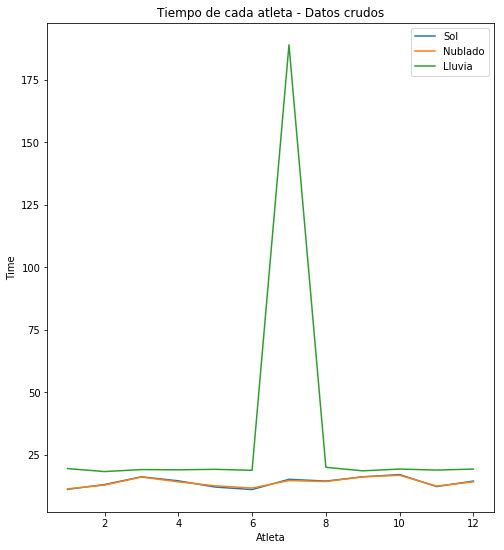

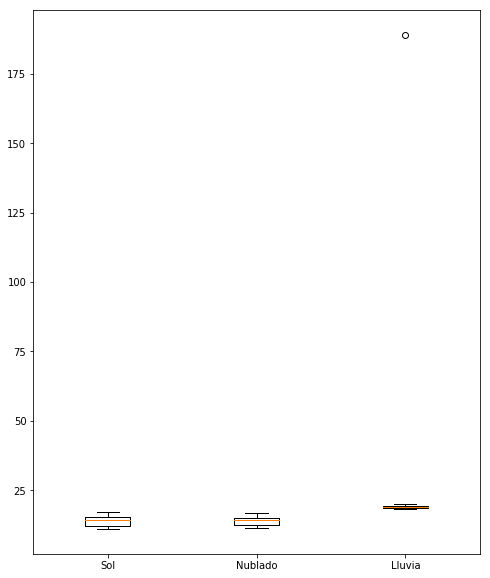

In [34]:
xs = np.array(dataset2)[:, 0]
fig_raw = plt.figure (1, figsize=(8 , 9)) #AGREGUE ESTO PARA AGRANDAR LAS IMAGENES
plt.plot(xs, raw_sol, label="Sol")
plt.plot(xs, raw_nublado, label="Nublado")
plt.plot(xs, raw_lluvia, label="Lluvia")
plt.legend(loc = 1)
plt.title("Tiempo de cada atleta - Datos crudos")
plt.xlabel("Atleta")
plt.ylabel("Time")
plt.show()

#BOX PLOT!!

data_box = [raw_sol,raw_nublado,raw_lluvia]
fig = plt.figure(1, figsize=(8 , 10))
ejes = fig.add_subplot(111)
boxp = ejes.boxplot(data_box)
ejes.set_xticklabels(['Sol', 'Nublado', 'Lluvia'])
plt.show()

<div>
    <p>Evaluamos si la distribución de las muestras son normales via Shapiro Wilk.</p>
    <p>Si p>0.05 no hay evidencia para afirmar que las distribuciones no sean normales.</p>
</div>

In [35]:
print("Normalidad de Sol") 
normal_sol = sp.shapiro(raw_sol)    
print("Shapiro Wilk [W]: %s" %round(normal_sol[0], 3) + "  p-value: %s" %round(normal_sol[1],3)+ "\n--------------------")
print("Normalidad de Nublado") 
normal_nublado = sp.shapiro(raw_nublado)    
print("Shapiro Wilk [W]: %s" %round(normal_nublado[0], 3) + "  p-value: %s" %round(normal_nublado[1],3)+ "\n--------------------")
print("Normalidad de LLuvia") 
normal_lluvia = sp.shapiro(raw_lluvia)    
print("Shapiro Wilk [W]: %s" %round(normal_lluvia[0], 3) + "  p-value: %s" %round(normal_lluvia[1],3)+ "\n--------------------")

Normalidad de Sol
Shapiro Wilk [W]: 0.938  p-value: 0.475
--------------------
Normalidad de Nublado
Shapiro Wilk [W]: 0.942  p-value: 0.53
--------------------
Normalidad de LLuvia
Shapiro Wilk [W]: 0.335  p-value: 0.0
--------------------


<div>
    <p>
        Evaluamos si la varianzas de dos o mas distribuciones son diferentes usando 
        la Prueba de Levene.
    </p>
    <p>
        Si p>.05 no hay evidencia para afirmar que las varianzas sean diferentes
    </p>
</div>

In [36]:
print("Prueba de Levene") 
levene = sp.levene(raw_sol,raw_nublado,raw_lluvia)  
print ("Varianza de los niveles:  " + str(round(levene[0],3)) + "  p-value: " + str(round(levene[1],3)))

Prueba de Levene
Varianza de los niveles:  0.839  p-value: 0.441


<b>Pareceria ser que el sujeto numero 7 es un outlier o un error de tipeo</b>
<p>
    Tanto gráficamente como la medida de normalidad de la condición lluvia muestran anormalidades.
</p>
<p>
    Usamos 2 desvíos standard para eliminar outliers. Es decir, los tiempos que superen los dos desvios standard serán considerados outliers y por lo tanto, separados.
</p>

In [37]:
mean_sol = np.mean(dataset2[:, 1])
std_sol = np.std(dataset2[:, 1])
mean_nublado = np.mean(dataset2[:, 2])
std_nublado = np.std(dataset2[:, 2])
mean_lluvia = np.mean(dataset2[:, 3])
std_lluvia = np.std(dataset2[:, 3])

dataset_without_outliers = []
for row in dataset2:
    if (row[1] < 2*std_sol + mean_sol and row[2] < 2*std_nublado + mean_nublado and row[3] < 2 * std_lluvia + mean_lluvia):
        dataset_without_outliers.append(row)

<p>Separamos nuevamente los valores de los tiempos del dataset en sol lluvia nublado</p>

In [38]:
sol = []
nublado = []
lluvia = []
for i in range (0,len(dataset_without_outliers)):
    sol.append(dataset_without_outliers[i][1])
    nublado.append(dataset_without_outliers[i][2])
    lluvia.append(dataset_without_outliers[i][3])

<p>
    Chequeamos nuevamente la normalidad del factor Lluvia para ver si ahora presenta una distribución normal
</p>

In [39]:
print("Normalidad de LLuvia - Modificada")  
normal_lluvia = sp.shapiro(lluvia)    
print("Shapiro Wilk [W]: %s" %round(normal_lluvia[0], 3) + "  p - value: %s" %round(normal_lluvia[1],3))

Normalidad de LLuvia - Modificada
Shapiro Wilk [W]: 0.985  p - value: 0.988


<p>Varianza</p>

In [40]:
print np.var(lluvia)
print np.var(nublado)
print np.var(sol)

0.189917355372
3.14727272727
3.96363636364


### Histogramas luego de remover outliers

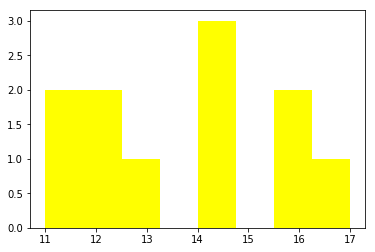

In [41]:
n_sol, bins_sol, _ = plt.hist(sol, bins=8, color="yellow")
plt.show()

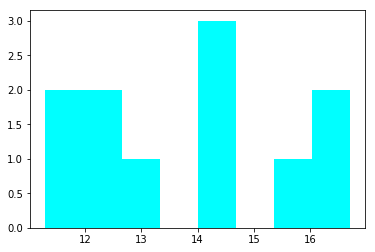

In [42]:
n_nublado, bins_nublado, _ = plt.hist(nublado, bins=8, color="cyan")
plt.show()

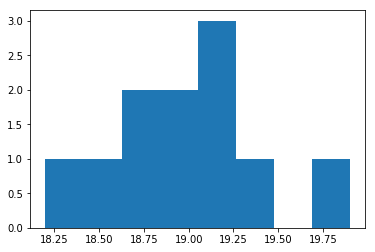

In [43]:
n_lluvia, bins_lluvia, _ = plt.hist(lluvia, bins=8)
plt.show()

### Gráfico luego de remover outliers

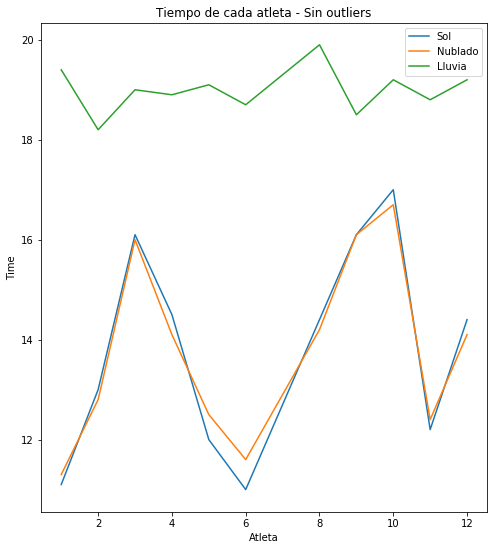

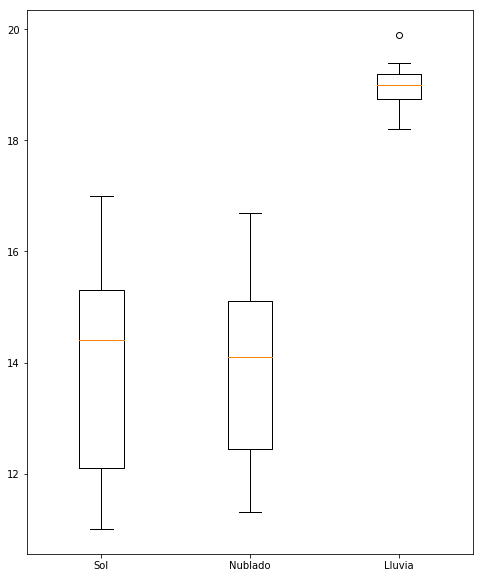

In [44]:
xs = np.array(dataset_without_outliers)[:, 0]
fig_r_norm = plt.figure (1, figsize=(8 , 9))  #AGREGUE ESTO PARA AGRANDAR LAS IMAGENES
plt.plot(xs, sol, label="Sol")
plt.plot(xs, nublado, label="Nublado")
plt.plot(xs, lluvia, label="Lluvia")
plt.legend(loc = 1)
plt.title("Tiempo de cada atleta - Sin outliers")
plt.xlabel("Atleta")
plt.ylabel("Time")
plt.show()

#BOX PLOT!!

data_box_norm = [sol,nublado,lluvia]
fig_norm = plt.figure(1, figsize=(8 , 10))
ejes_norm = fig_norm.add_subplot(111)
boxp_norm = ejes_norm.boxplot(data_box_norm)
ejes_norm.set_xticklabels(['Sol', 'Nublado', 'Lluvia'])
plt.show()

## Parte 2. Tests

<p><b>1) H<sub>0</sub></b>: 
    En días soleados, los atletas corren a la misma velocidad que en días lluviosos
</p>
<p><b>H<sub>1</sub></b>(alternativa): Los atletas corren a diferentes velocidades los dias de sol en comparación con los de lluvia.

In [45]:
sp.ttest_rel(sol,lluvia)

Ttest_relResult(statistic=-8.1659802299869533, pvalue=9.832130127750511e-06)

<p>
    El p-valor tan pequeño nos dice que la probabilidad que los tiempos de los atletas en 
    dias de sol y de lluvia es más pequeña que .05, por lo tanto, nos permite rechazar la hipótesis nula,
    y observar que los tiempos en dias de lluvia es mas lento.
</p>

### Alternativa usando permutaciones

In [46]:
import itertools
import random

<p>
    Si considero que los tiempos de los atletas son independientes del clima (soleado o lluvia)
    Debo considerarlos de la misma manera
</p>

In [47]:
sol_y_lluvia = sol + lluvia

<p>Cálculo de deltas</p>

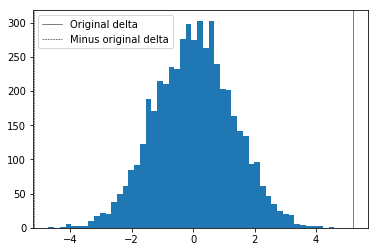

In [48]:
n_samples = 5000
n_atletas = len(lluvia)
deltas = []
for i in range(0, n_samples):
    sol_i = [ random.choice(sol_y_lluvia) for i in range (0, n_atletas) ]
    lluvia_i = [ random.choice(sol_y_lluvia) for i in range (0, n_atletas) ]
    mean_sol_i = np.mean(sol_i)
    mean_lluvia_i = np.mean(lluvia_i)
    delta = mean_lluvia_i - mean_sol_i
    deltas.append(delta)
    
n, bins, _ = plt.hist(deltas, 50, normed=False)
original_delta = np.mean(lluvia) - np.mean(sol)
plt.axvline(x= original_delta, linestyle="-", color="black", linewidth=0.5, label="Original delta")
plt.axvline(x= -original_delta, linestyle="--", color="black", linewidth=0.5, label="Minus original delta")
plt.legend()
plt.show()

<p>Cálculo del p-valor</p>

In [49]:
permutations_p_value = None
matching_indexes = [i for i, x in enumerate(bins) if abs(bins[i]) >= original_delta ]
count = 0
if len(matching_indexes) == 0:
    permutations_p_value = 0.0
else:
    for i in matching_indexes:
        if(i < len(n)):
            count += n[i]
    permutations_p_value = count / n_samples
print "p-valor: " + str(permutations_p_value)

p-valor: 0.0


#### Nuevamente se rechaza la hipotesis nula. Pudiendo afirmar que las velocidades de los atletas difieren entre los días de lluvia y sol. Más precisamente que en condiciones climáticas de luvia, los atletas corren más lento.

<p><b>2) H<sub>0</sub></b>: 
    El clima nublado no influye en el tiempo de los atletas, es decir, en dias soleados y nublados los tiempos de los atletas son similares.
</p>
<p><b>2) H<sub>1</sub></b>(alternativa): 
    El clima nublado influye en el tiempo de los atletas.

In [50]:
sp.ttest_rel(sol, nublado)


Ttest_relResult(statistic=1.600386423731163e-15, pvalue=0.99999999999999878)

<p> 
    El p-valor tan alto, nos permite pensar que los tiempos en sol 
    y nubes tienen distribucion similar. Por lo tanto no se rechaza la hipotesis nula.
</p>

<p><b>3) H<sub>0</sub></b>: 
    La velocidad entre los atletas es independiente de la condicion climatica lluvia
</p>
<p><b>3) H<sub>1</sub></b>(alternativa):
El desempeño de los atletas entre ellos, varia los días de lluvia.

<p>
    Si la velocidad entre los atletas es independiente de la lluvia, la variabilidad entre los sujetos 
    deberia ser igual sin importar la condición climática. 
    Por ende comparar el desempeño de un mismo sujeto en dos condiciones podria 
    informanos de la independencia. Para esto evaluaremos si la velocidad de un mismo 
    sujeto co-varia en diferentes condiciones climáticas. Si co-varia se podría asumir la independencia.
</p>

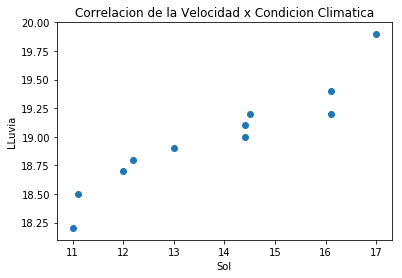

R: 0.942  p-value: 1e-05


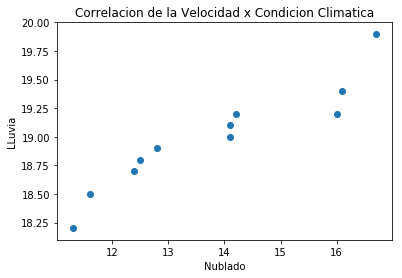

R: 0.936  p-value: 2e-05


In [51]:
lluvia_sort = (sorted(lluvia))
sol_sort = (sorted(sol))
nublado_sort = (sorted(nublado))

plt.scatter (sol_sort,lluvia_sort)
plt.title("Correlacion de la Velocidad x Condicion Climatica")
plt.xlabel("Sol")
plt.ylabel("LLuvia")
plt.show()
corr_sol_lluvia = sp.pearsonr(sol_sort,lluvia_sort)
print("R: %s" %round(corr_sol_lluvia[0], 4) + "  p-value: %s" %round(corr_sol_lluvia[1],5))

plt.scatter (nublado_sort,lluvia_sort)
plt.title("Correlacion de la Velocidad x Condicion Climatica")
plt.xlabel("Nublado")
plt.ylabel("LLuvia")
plt.show()
corr_nublado_lluvia = sp.pearsonr(nublado_sort,lluvia_sort)
print("R: %s" %round(corr_nublado_lluvia[0], 4) + "  p-value: %s" %round(corr_nublado_lluvia[1],5))

##### Dado que el desempeño de los atletas correlaciona tanto en los dias de lluvia con su desempeño en los dias nublados y soleados, se rechazaría la hipotesis nula. 

<p><b>4) H<sub>0</sub></b>: 
    Los grupos presentan las mismas velocidades sin importar la condicion climàtica
</p>
<p><b>4) H<sub>1</sub></b>(alternativa):
    Los grupos presentan diferentes velocidades segun la condición climática

In [52]:
# Anova un factor,  con la condicion "Clima" como factor de 3 niveles
anova_clima = sp.f_oneway(sol,nublado,lluvia)
print anova_clima

F_onewayResult(statistic=36.907516413855539, pvalue=8.1830487111034126e-09)


<p>Los resultados del ANOVA permiten rechazar la H_0</p>

<p>Para hacer el post hoc hay que estructurar los datos de la siguiente forma: Columna = Variable, Fila = Un caso, el cual
contiene el caso por caso</p>

In [53]:
import statsmodels.stats.multicomp as multi
tiempos =sol + nublado + lluvia
condicion = 1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3
dataset4 = np.zeros(shape=(len(tiempos),2))
dataset4[:,0]= tiempos
dataset4[:,1]= condicion
# print(dataset4)

post_hoc= multi.MultiComparison(dataset4[:,0],dataset4[:,1])
tabla_ph = post_hoc.tukeyhsd()
print (tabla_ph.summary())

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 1.0    2.0     -0.0   -1.7195 1.7195 False 
 1.0    3.0    5.1909   3.4714 6.9104  True 
 2.0    3.0    5.1909   3.4714 6.9104  True 
--------------------------------------------


<p>
    Los post-hoc señalan que la diferencia significativa se encuentra entre las condiciones "Sol" y "Lluvia" , y las condiciones "Nublado" y "LLuvia". Mientras que las condiciones "Sol"  y "Nublado" no muestran diferencias. Esto es consistente con las conclusiones extraidas anteriormente
</p>

### Consejos al Entrenador

Los atletas entrenan todos los días. Un día salen a correr y hay sol, entonces advierten que algunos terminan de correr antes que otros (datos observados iniciales). Lo mismo ocurre en días nublados. Y otro día, salen a correr con lluvia, y observan que todos corren a una velocidad similar y más lento que de costumbre (ej 1), por ejemplo por ser cautos en el camino para no resbalarse, marcando tiempos muy similares. Por lo tanto piensan que correr con lluvia no tiene mucho sentido.

Pero el entrenador, que es el encargado de prepararos para las competencias, hace foco en que los días lluviosos corren más lento que los dias soleados y por lo tanto cree que deben entrenar por si una competencia sucede en un día lluvioso puedan demostrar sus cualidades marcando el mejor tiempo que pueden alcanzar.

Las medidas en las que se basó para tomar la decisión son las estudiadas en el ej 1 y ej 3.

Para dirimir la cuestión, haría falta un arreglo experimental que evalué puntualmente el desempeño de un grupo que entrene en condiciones climáticas de lluvia durante un periodo de tiempo y que sea comparado con el desemepeño de un grupo que solo entrene en días soleados. Se compararían de esta manera el desempeño de los grupos antes de entrenar (pre-entrenamiento) con el desempeño luego del periodo de entrenamiento (post-entrenamiento).